# Artificial Neural Network

### Importing the libraries

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Data Preprocessing

### Importing the dataset

In [25]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking for missing data

In [26]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Visualising Data

Dependent Variable

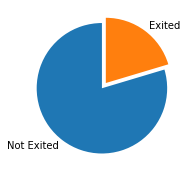

In [27]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

explode = [0,0.1]

fig, ax = plt.subplots(figsize = (4, 3))

ax.pie(values, labels = labels, startangle = 90, explode = explode)

plt.show()

Categorical Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

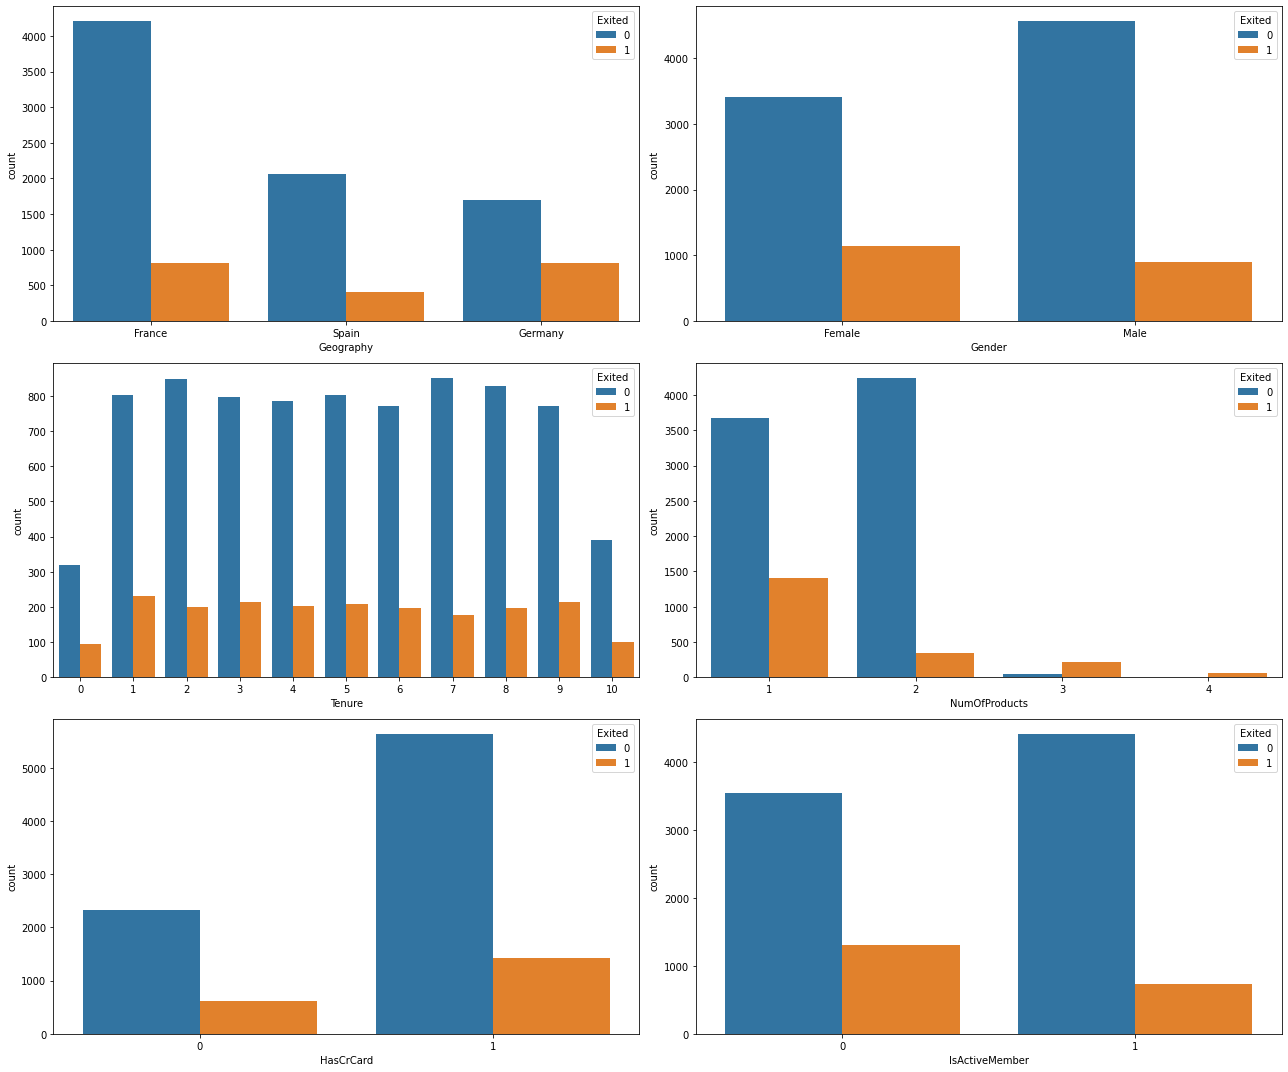

In [28]:
fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1])

plt.tight_layout()
plt.show()

Continuous Data

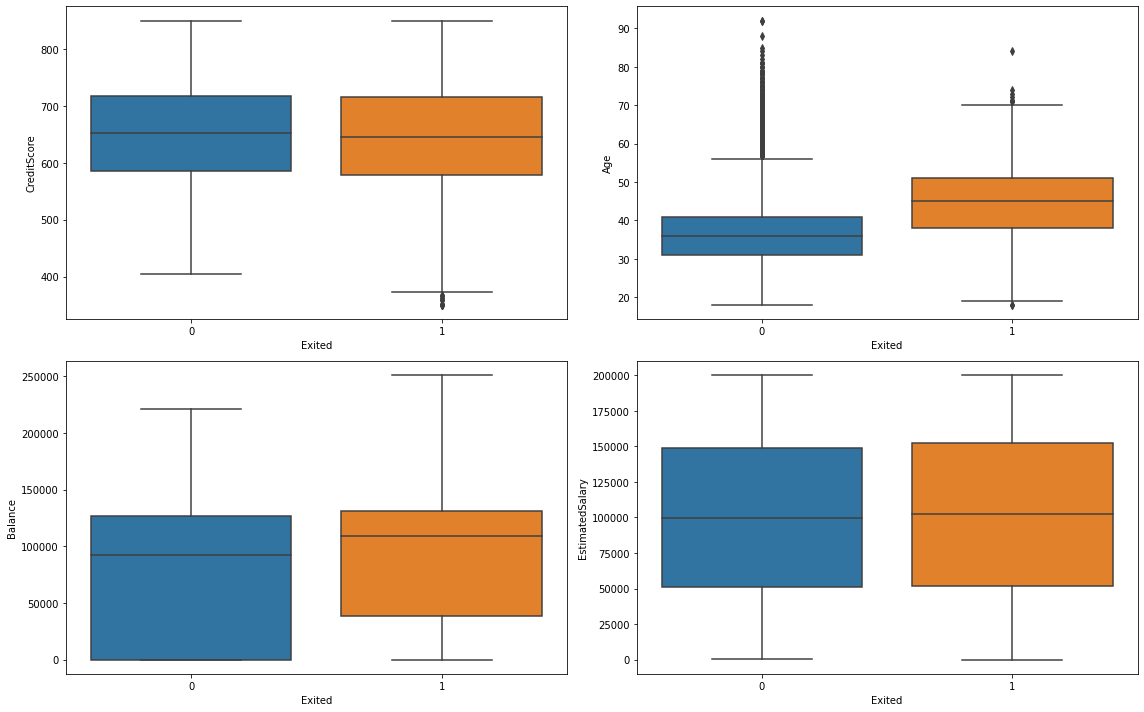

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

Collinearity

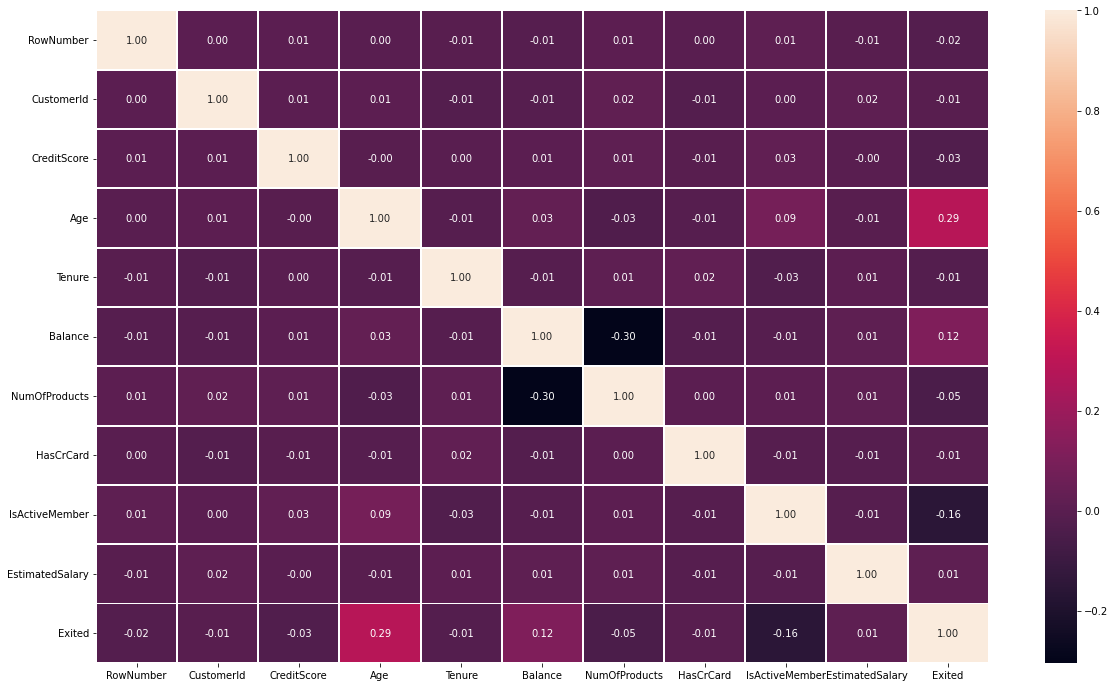

In [30]:
plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

### Drop Unhelpful Collumns

In [31]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

### Separate Dependent and Independent Features

In [32]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data

Label Encoding the "Gender" column

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

One Hot Encoding the "Geography" column

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [37]:
ann = tf.keras.models.Sequential()

### Adding the input and hidden layers

In [38]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [39]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [40]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [41]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5221 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7990
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4207 - accuracy: 0.8158
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4177 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [42]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1504   91]
 [ 191  214]]


0.859

### Predicting the result of a single observation

In [44]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]
